In [5]:
import networkx as nx
from networkx.algorithms import community
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import random
plt.rcParams.update({'figure.max_open_warning': 50})

In [9]:
def plot_degree_dist(G):
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
    
    plt.figure()
    plt.plot(values, P_k, "ro-")
    plt.xlabel("k")
    plt.ylabel("p(k)")
    plt.title("Degree Distribution")
    plt.show()
    
    plt.figure()
    plt.grid(False)
    plt.loglog(values, P_k, "bo-")
    plt.xlabel("log k")
    plt.ylabel("log p(k)")
    plt.title("log Degree Distribution")
    plt.show()
    plt.figure()
    degrees = [G.degree(n) for n in G.nodes()]
    counts = dict()
    for i in degrees:
        counts[i] = counts.get(i, 0) + 1
    axes = plt.gca()
    axes.set_xlim([0,100])
    axes.set_ylim([0,1000])
    plt.grid(False)
    plt.bar(list(counts.keys()), counts.values(), color='r')
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()

'''
Generates a plot with the degrees of distribution of the connected components. 
To facilitate the representation it was decided to also use the loglog contained in numpy.
Plot of the histogram degree distribution 
-------------------------------------------------- 
Input: G---> Graphs (a networkx graph) 
Output: a list of values of the degree distribution
'''

'\nGenerates a plot with the degrees of distribution of the connected components. \nTo facilitate the representation it was decided to also use the loglog contained in numpy.\nPlot of the histogram degree distribution \n-------------------------------------------------- \nInput: G---> Graphs (a networkx graph) \nOutput: a list of values of the degree distribution\n'

In [6]:
def plot_degree_In(G):
    N = G.order()
    in_degrees = G.in_degree()  #built-in function to estimate in-degree distribution
    in_degrees = dict(in_degrees)
    in_values= sorted(set(in_degrees.values()))
    in_hist = [list(in_degrees.values()).count(x) for x in in_values]
    in_P_k = [x / N for x in in_hist]
    out_degrees = G.out_degree()   #built-in function to estimate out-degree distribution
    out_degrees = dict(out_degrees)
    out_values = sorted(set(out_degrees.values()))
    out_hist = [list(out_degrees.values()).count(x) for x in out_values]
    out_P_k = [x / N for x in out_hist]
    
    plt.figure()
    plt.grid(False)
    plt.plot(in_values ,in_P_k, "r.")
    plt.plot(out_values,out_P_k, "b.")
    plt.legend(['In-degree','Out-degree'])
    plt.xlabel("k")
    plt.ylabel("p(k)")
    plt.title("Degree Distribution")
    plt.show()
    
    plt.figure()
    plt.grid(False)
    plt.loglog(in_values ,in_P_k, "r.")
    plt.loglog(out_values,out_P_k, "b.")
    plt.legend(['In-degree','Out-degree'])
    plt.xlabel("log k")
    plt.ylabel("log p(k)")
    plt.title("log log Degree Distribution")
    plt.show()

'''
Generates a plot with the IN/OUT degrees of distribution of the connected components. 
To facilitate the representation it was decided to also use the loglog contained in numpy 
-------------------------------------------------- 
Parameters 
Input: G---> Graphs A networkx graph 
Output: a list of values of the degree distribution
'''

'\nGenerates a plot with the IN/OUT degrees of distribution of the connected components. \nTo facilitate the representation it was decided to also use the loglog contained in numpy \n-------------------------------------------------- \nParameters \nInput: G---> Graphs A networkx graph \nOutput: a list of values of the degree distribution\n'

In [7]:
def plot_clustering_coefficient(G):
        clust_coefficients = nx.clustering(G)  #built-in function to estimate clustering coeff  
        clust_coefficients = dict(clust_coefficients)
        values1= sorted(set(clust_coefficients.values()))
        histo1 = [list(clust_coefficients.values()).count(x) for x in values1]
        
        plt.figure()
        plt.grid(False)
        plt.plot(values1,histo1, "r.")
        plt.xlabel("k")
        plt.ylabel("C (Clustering Coeff)")
        plt.title("Clustering Coefficients")
        plt.show()
        plt.figure()
        plt.grid(False)
        plt.loglog(values1,histo1, "r.")
        plt.xlabel("log degree k")
        plt.ylabel("c (clustering coeff)")
        plt.title("log log Clustering Coefficients")
        plt.show()
        
        plt.figure()
        degrees1 = [nx.clustering(G,n) for n in G.nodes()]
        plt.hist(degrees1)
        plt.xlabel("log degree k")
        plt.ylabel("C (Clustering Coeff) hist")
        plt.title("Clustering Coefficients")
        plt.show()

'''
Generates a plot with the  clustering coefficient.
It is a measure of the degree to which nodes in a graph tend to cluster together.
Parameters
Input: G---> Graphs
Output: a list of values of the degree distribution
'''

'\nGenerates a plot with the  clustering coefficient.\nIt is a measure of the degree to which nodes in a graph tend to cluster together.\nParameters\nInput: G---> Graphs\nOutput: a list of values of the degree distribution\n'

In [7]:
def adjacent_edges(nodes, halfk):    

    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u,v


       
def make_ring_lattice(n,k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

def flip(p):
    return np.random.random() < p 

def rewire(G,p):
    nodes = set(G)
    for u, v in G.edges():
        if flip(p): 
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(u, new_v)
            
def small_world(n,k,p):
    sw = make_ring_lattice(n,k)
    rewire(sw,p)
    return sw

'''
Generate a view of lattice graph
Parameters:
G (NetworkX graph) – 
k (node) – number of adjacent nodes
Returns a graph lattice view
'''

'\nGenerate a view of lattice graph\nParameters:\nG (NetworkX graph) – \nk (node) – number of adjacent nodes\nReturns a graph lattice view\n'

['0 1', '0 2', '0 4519', '0 23073', '0 33043', '0 33971', '0 75503', '0 101215', '0 120044', '0 123880', '0 124002', '0 206567', '0 274042', '0 369692', '0 411025', '0 413808', '1 2', '1 5915', '1 7741', '1 7852', '1 7979', '1 8085', '1 8086', '1 9335', '1 10971', '1 12238', '1 13090', '1 13419', '1 13811', '1 14662', '1 15004', '1 15432', '1 16259', '1 16408', '1 16803', '1 17411', '1 18035', '1 21502', '1 22970', '1 27021', '1 27466', '1 28995', '1 29998', '1 31096', '1 33126', '1 33762', '1 35156', '1 36918', '1 37774', '1 40548', '1 44446', '1 44725', '1 46588', '1 47489', '1 49063', '1 49144', '1 56260', '1 58164', '1 58212', '1 63386', '1 66243', '1 66305', '1 66668', '1 67191', '1 73133', '1 74815', '1 75213', '1 77551', '1 78424', '1 81806', '1 83059', '1 84042', '1 84805', '1 85126', '1 86291', '1 90680', '1 92739', '1 92740', '1 93377', '1 95874', '1 97590', '1 97591', '1 97758', '1 103133', '1 110696', '1 113230', '1 115324', '1 122675', '1 159465', '1 162643', '1 164373', '

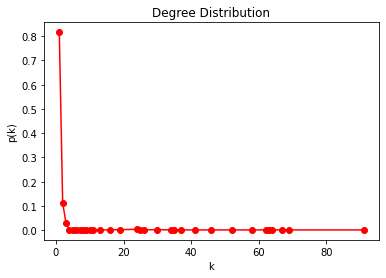

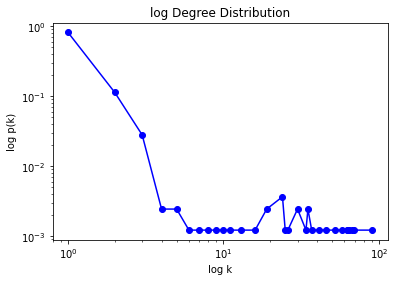

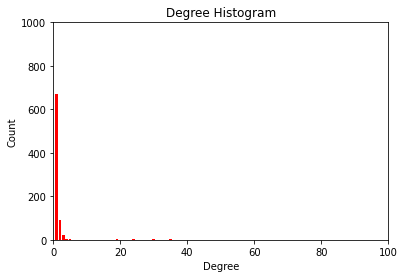

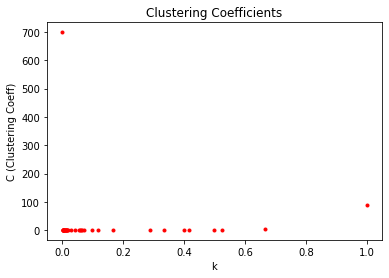

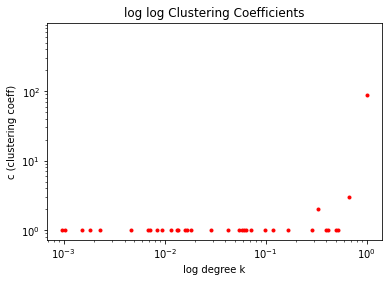

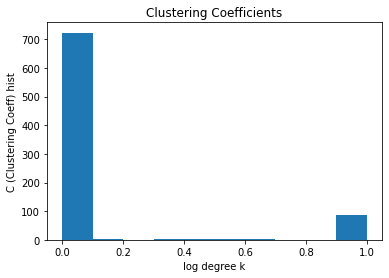

Average clustering coefficient: 0.11384255641205103


In [10]:
graphs = nx.read_edgelist('com-dblp.ungraph.txt',create_using=nx.Graph(), nodetype=int) 

subset = 1000
edges = graphs.edges()
edges = list(edges)[:int(subset)]   
edges = [list(elem) for elem in edges] 


#Formatting

_newlist = []
_list = []

for subsets in edges:
    for element in subsets:
        _list.append(element)

_temp= int(len(_list)*0.5)

for i in range (_temp):
    _newlist.append(str(_list[2*i]) + " " + str(_list[2*i +1]) ) 
print(_newlist)
graphs = nx.parse_edgelist(_newlist, nodetype = int)
#%%

"""Order, no. of edges, & the average degree of a node"""
N=graphs.order()  
E = graphs.number_of_edges()  
Av_deg_undirected = float(2*E)/N  

print ("\n ORIGINAL GRAPH: ")
print("The number of nodes is:", N)
print("The number of edges is:", E)
print("Average degree (undirected graph):", Av_deg_undirected)

plot_degree_dist(graphs) 
plot_clustering_coefficient(graphs)
print ('Average clustering coefficient: ' + str(nx.average_clustering(graphs)))

In [11]:
communities_gen = community.girvan_newman(graphs)
top_level_communities = next(communities_gen)
next_level_communities = next(communities_gen)
a=sorted(map(sorted,next_level_communities))


 Erdos-Renyi graph: 
Number of nodes: 823
Number of edges: 1011
Average degree (undirected graph): 2.456865127582017


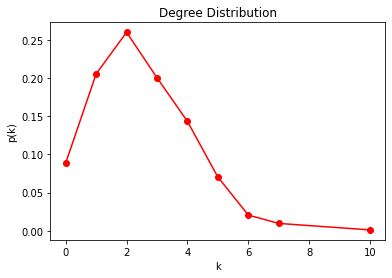

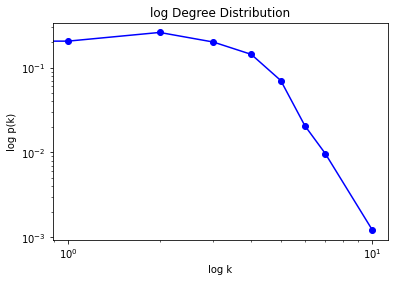

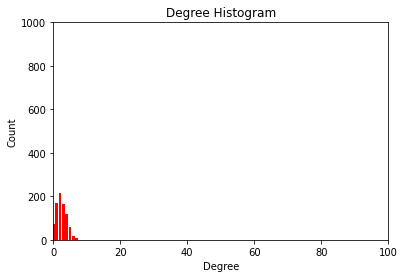

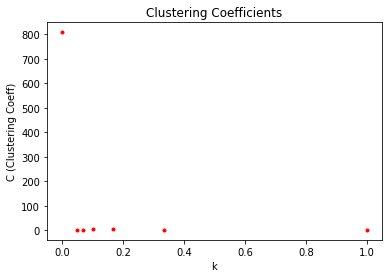

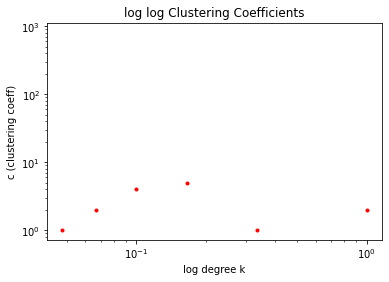

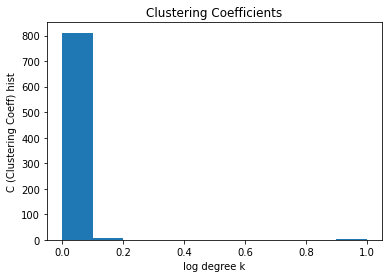

Average clustering coefficient: 0.004553607591274663


In [15]:
#Erdos-Renyi model

Prob = E/(N*(N-1)/2)
Erdos_renyi = nx.erdos_renyi_graph (N, Prob)
Nodes_erdos=Erdos_renyi.order()
Edges_erdos = Erdos_renyi.number_of_edges()
Av_deg_und_erdos = float(2*Edges_erdos)/Nodes_erdos  

print ("\n Erdos-Renyi graph: ")
print("Number of nodes:", Nodes_erdos)
print("Number of edges:", Edges_erdos)
print("Average degree (undirected graph):", Av_deg_und_erdos)

plot_degree_dist(Erdos_renyi) 
plot_clustering_coefficient(Erdos_renyi)
print ('Average clustering coefficient: ' + str(nx.average_clustering(Erdos_renyi)))


Small world model: 
Number of nodes: 823
Number of edges: 1646
Average degree (undirected graph): 4.0


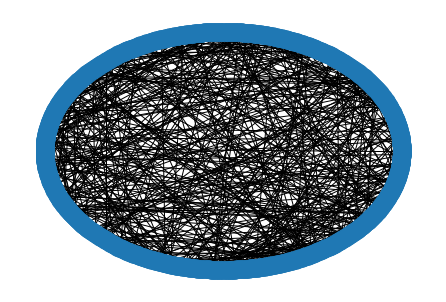

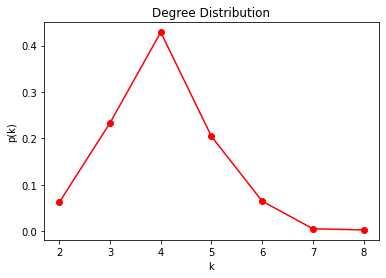

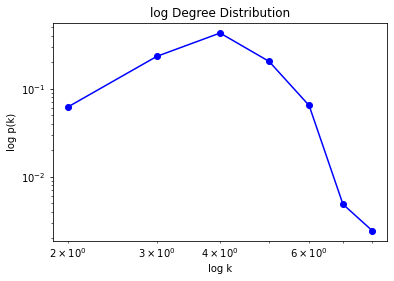

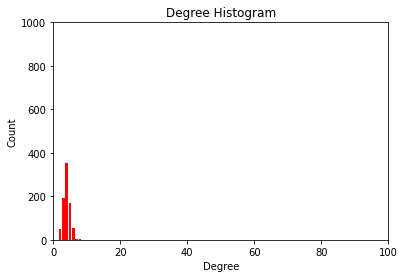

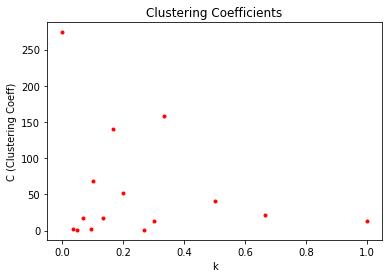

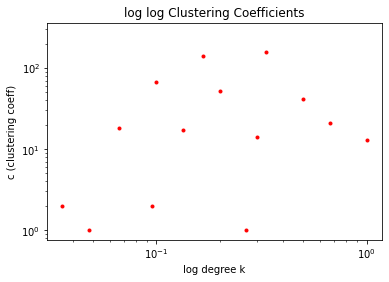

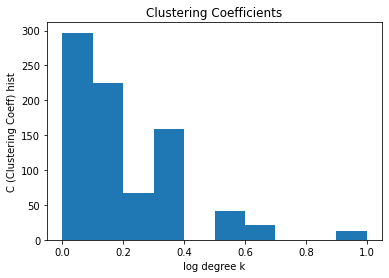

Avverage clustering coefficient: 0.18138054735867584


In [16]:
#Small world model

Small_World = small_world(N,4,0.3)
nx.draw_circular(Small_World)

Nodes_SW=Small_World.order()
Edge_SW = Small_World.number_of_edges()
Av_deg_SW = float(2*Edge_SW)/Nodes_SW  
print ("\nSmall world model: ")
print("Number of nodes:", Nodes_SW)
print("Number of edges:", Edge_SW)
print("Average degree (undirected graph):", Av_deg_SW)

plot_degree_dist(Small_World) 
plot_clustering_coefficient(Small_World)
print ('Avverage clustering coefficient: ' + str(nx.average_clustering(Small_World)))


50% of the links were removed.
Number of nodes: 823
Number of edges: 1400
Average degree (directed graph): 1.2150668286755772


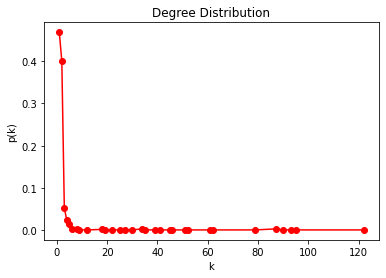

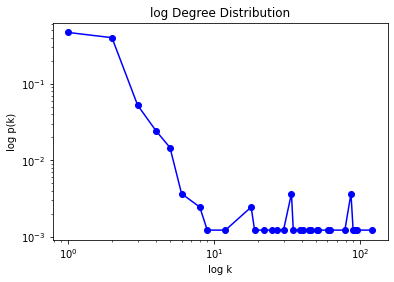

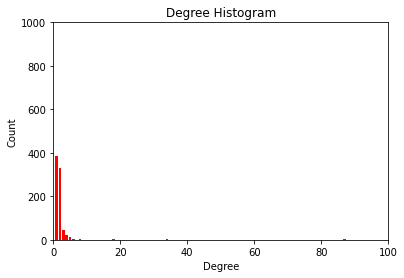

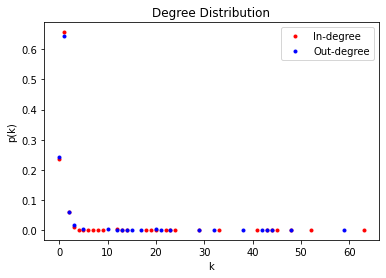

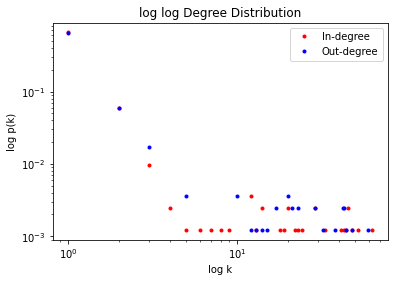

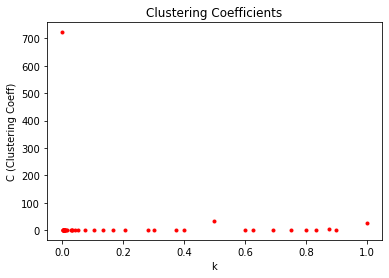

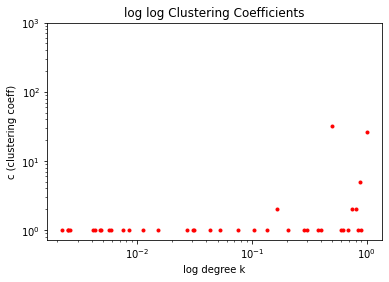

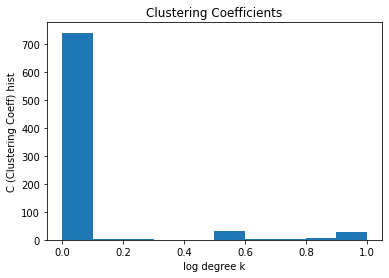

Average clustering coefficient: 0.08992874477480321


In [17]:
#Removing half of the links

k = int(E*0.6)
DG = graphs.copy()
DG = DG.to_directed()
edges_d = DG.edges()
list_edges_d = list(edges_d)
random.shuffle(list_edges_d)

for edgee in list_edges_d:
    if (DG.degree(edgee[0]) != 1 and DG.degree(edgee[1]) != 1):
        DG.remove_edge(edgee[0],edgee[1])
        k-=1
    if (k==0):
        break

N4=DG.order()
E4 = DG.number_of_edges()
Av_deg_d = float(E)/N 

print ("\n50% of the links were removed.")
print("Number of nodes:", N4)
print("Number of edges:", E4)
print("Average degree (directed graph):", Av_deg_d)

plot_degree_dist(DG)
plot_degree_In(DG)
plot_clustering_coefficient(DG)
DG = DG.to_undirected()
print ('Average clustering coefficient: ' + str(nx.average_clustering(DG)))

In [13]:
nodes = dict()
val = 0
for node in list(graphs.nodes()):
    nodes[node] = val
    val += 1

In [14]:
# Pagerank measures - simple pagerank, personalized pagerank, nstart pagerank, weighted pagerank,
#& weighted personalized pagerank
simple_pagerank = nx.pagerank(graphs, alpha=0.85)
personalized_pagerank = nx.pagerank(graphs, alpha=0.85, personalization=nodes)
nstart_pagerank = nx.pagerank(graphs, alpha=0.85, nstart=nodes)
weighted_pagerank = nx.pagerank(graphs, alpha=0.85)
weighted_personalized_pagerank = nx.pagerank(graphs, alpha=0.85, personalization=nodes)

df_metrics = pd.DataFrame(dict(
    simple_pagerank = simple_pagerank,
    personalized_pagerank = personalized_pagerank,
    nstart_pagerank = nstart_pagerank,
    weighted_pagerank = weighted_pagerank,
    weighted_personalized_pagerank = weighted_personalized_pagerank,
))
df_metrics.index.name='Nodes'
df_metrics

,simple_pagerank,personalized_pagerank,nstart_pagerank,weighted_pagerank,weighted_personalized_pagerank
Nodes,,,,,
0,0.005962,0.003031,0.005960,0.005962,0.003031
1,0.037163,0.030464,0.037173,0.037163,0.030464
2,0.009956,0.005414,0.009952,0.009956,0.005414
4519,0.017079,0.006355,0.017057,0.017079,0.006355
23073,0.015190,0.007020,0.015167,0.015190,0.007020
...,...,...,...,...,...
25549,0.000554,0.000831,0.000555,0.000554,0.000831
25661,0.000554,0.000832,0.000555,0.000554,0.000832
26170,0.000554,0.000832,0.000555,0.000554,0.000832


In [15]:
page_rank = nx.pagerank(graphs)
page_rank

{0: 0.0059623490800138354,
 1: 0.037162621041693676,
 2: 0.009956248272416642,
 4519: 0.017079492008007464,
 23073: 0.01518997460671536,
 33043: 0.016122739902477014,
 33971: 0.03320609732863992,
 75503: 0.00833704685965085,
 101215: 0.003787753262972535,
 120044: 0.012372715898367106,
 123880: 0.0030603782878411367,
 124002: 0.00609258558028796,
 206567: 0.0013179117715785157,
 274042: 0.003511376368136713,
 369692: 0.002312533584580766,
 411025: 0.0009018181600887907,
 413808: 0.0010929000438946017,
 5915: 0.002504999600893292,
 7741: 0.0032771959098976274,
 7852: 0.02682435541515454,
 7979: 0.024544097061810273,
 8085: 0.016307266772743734,
 8086: 0.022980646446164887,
 9335: 0.013318028407969635,
 10971: 0.007273405162106294,
 12238: 0.019502466935303525,
 13090: 0.03258455176226287,
 13419: 0.016282290229556972,
 13811: 0.01560137917312025,
 14662: 0.02661772924667134,
 15004: 0.028226294432476286,
 15432: 0.008369499779442052,
 16259: 0.005361032146464102,
 16408: 0.0317775122801

In [16]:
dict_degree_centrality = nx.degree_centrality(graphs)
dict_degree_centrality

{0: 0.019464720194647202,
 1: 0.11070559610705596,
 2: 0.031630170316301706,
 4519: 0.04257907542579076,
 23073: 0.03649635036496351,
 33043: 0.04257907542579076,
 33971: 0.08150851581508516,
 75503: 0.029197080291970802,
 101215: 0.009732360097323601,
 120044: 0.030413625304136254,
 123880: 0.010948905109489052,
 124002: 0.015815085158150853,
 206567: 0.0036496350364963502,
 274042: 0.012165450121654502,
 369692: 0.00851581508515815,
 411025: 0.0024330900243309003,
 413808: 0.0036496350364963502,
 5915: 0.006082725060827251,
 7741: 0.0072992700729927005,
 7852: 0.0705596107055961,
 7979: 0.06326034063260341,
 8085: 0.049878345498783457,
 8086: 0.05596107055961071,
 9335: 0.029197080291970802,
 10971: 0.023114355231143552,
 12238: 0.045012165450121655,
 13090: 0.07664233576642336,
 13419: 0.0413625304136253,
 13811: 0.03649635036496351,
 14662: 0.07785888077858881,
 15004: 0.07542579075425791,
 15432: 0.023114355231143552,
 16259: 0.013381995133819952,
 16408: 0.08394160583941607,
 168

In [17]:
dict_closeness_centrality = nx.closeness_centrality(graphs)
dict_closeness_centrality

{0: 0.38501170960187353,
 1: 0.47268545140885565,
 2: 0.3635559486952676,
 4519: 0.2902542372881356,
 23073: 0.2890295358649789,
 33043: 0.299017824663514,
 33971: 0.31362075543685614,
 75503: 0.288623595505618,
 101215: 0.28541666666666665,
 120044: 0.2832529290144728,
 123880: 0.2836438923395445,
 124002: 0.28208647906657514,
 206567: 0.2811217510259918,
 274042: 0.28344827586206894,
 369692: 0.2804503582395087,
 411025: 0.27864406779661016,
 413808: 0.2800681431005111,
 5915: 0.3221003134796238,
 7741: 0.32235294117647056,
 7852: 0.3487484089944845,
 7979: 0.3423573511037068,
 8085: 0.34668916069169126,
 8086: 0.35023434171282486,
 9335: 0.3269689737470167,
 10971: 0.3334685598377282,
 12238: 0.33025311370028126,
 13090: 0.34698184888138456,
 13419: 0.3334685598377282,
 13811: 0.3282747603833866,
 14662: 0.3396694214876033,
 15004: 0.3625937362152625,
 15432: 0.3396694214876033,
 16259: 0.33065164923572005,
 16408: 0.35038363171355497,
 16803: 0.34815756035578144,
 17411: 0.32247940

In [18]:
dict_harmonic_centrality = nx.harmonic_centrality(graphs)
dict_harmonic_centrality

{0: 334.4999999999981,
 1: 425.5000000000009,
 2: 316.8333333333331,
 38912: 210.03333333333117,
 200704: 221.08333333333408,
 188416: 223.53333333333464,
 22534: 247.11666666666713,
 22531: 221.36666666666713,
 223237: 221.36666666666713,
 102411: 231.15000000000055,
 4111: 223.60000000000042,
 184339: 223.60000000000042,
 63508: 223.60000000000042,
 184340: 223.60000000000042,
 16408: 332.50000000000256,
 321570: 283.8333333333364,
 385061: 221.36666666666713,
 14378: 223.53333333333464,
 36909: 249.6500000000003,
 124973: 223.20000000000044,
 256047: 193.94999999999658,
 108592: 210.03333333333117,
 415793: 211.53333333333381,
 36918: 283.8333333333364,
 26680: 223.53333333333464,
 92218: 189.06666666666365,
 26682: 226.11666666666804,
 8255: 223.60000000000042,
 282689: 226.11666666666804,
 84042: 283.5000000000015,
 51280: 227.95000000000067,
 94291: 227.95000000000067,
 36949: 223.60000000000042,
 2133: 215.11666666666702,
 57433: 193.94999999999658,
 223322: 283.1666666666677,
 

In [19]:
dict_betweeness=nx.betweenness_centrality(graphs)
dict_betweeness

{0: 0.25454094410427397,
 1: 0.7241550221973441,
 2: 0.06254343333493866,
 4519: 0.0732340208533119,
 23073: 0.06345507451283858,
 33043: 0.06580348811027072,
 33971: 0.14263535949969597,
 75503: 0.023310792712602623,
 101215: 0.012229018673447311,
 120044: 0.050444387148780044,
 123880: 0.002638663359887866,
 124002: 0.021727405010209495,
 206567: 0.0,
 274042: 0.005050339136954972,
 369692: 0.0018111464810894463,
 411025: 0.0,
 413808: 0.0,
 5915: 0.008183090976906584,
 7741: 0.012135814433173004,
 7852: 0.10481891538938969,
 7979: 0.10032170073578611,
 8085: 0.06474243983512439,
 8086: 0.10073602771065368,
 9335: 0.05521128764102883,
 10971: 0.022151545233597823,
 12238: 0.08051847914308641,
 13090: 0.1359609299076924,
 13419: 0.06709856665247564,
 13811: 0.06311841390924255,
 14662: 0.09863640197953014,
 15004: 0.12337579772926005,
 15432: 0.02630198234343968,
 16259: 0.01938174026689901,
 16408: 0.12095094172728027,
 16803: 0.04101533203149539,
 17411: 0.0,
 18035: 0.0,
 21502: 0.